Проект 2. Юнит Разведовательный анализ данных.
Цель: Произвести разведовательный анализ предоставленных данных
Задачи:
1. Изучить предоставленный датасет
2. Произвести очистку данных от дубликатов
3. Произвести анализ числовых признаков, выявить выбросы и очистить данные от них
4. Оценить количество пропусков и оценить возможные методы работы с ними
5. Отобрать признаки влияющие на ключевой параметр для последюущего включения в модель

Произведем предварительные операции:

In [2]:
# Загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

# Расширяем диапазон отображаемых данных.
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

Произведем загрузку данных:

In [3]:
stud_df = pd.read_csv('stud_math.csv')

Посмотрим предварительно на загруженный датасет:

In [4]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Видим, что все столбцы загрузились корректно. Сразу бросается в глаза, что имеются пропуски.
Выведем основную информацию о датасете:

In [5]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итак: 
Всего строк 395, при этом столбцов не содержащих пропуски только 3: school, sex и age. 
Числовых столбцов 13 и 17 текстовых.
При этом истинно числовыми можно назвать только стоблы с возрастом, баллом по математике и пропущенными занятиями.
Отстальные являются порядковыми признаками.
Среди текстовых столбцов большая часть относится к биноминальным, кроме работы отца и матери, причины выбора школы и опекуна, являющихся номинативными.

Посмотрим сколько у нас есть дубликатов:

In [6]:
stud_df.duplicated().sum()

0

Удивительно! Ни одного.

Теперь посмотрим, какое распредление у наших числовых признаков, а также вбросы.
Для отображения возьмем гистограмму, т.к. она отразит как распределение действительно числовых признаков, а для порядковых заменит столбчатую диаграмму. 

Описание признака: age


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

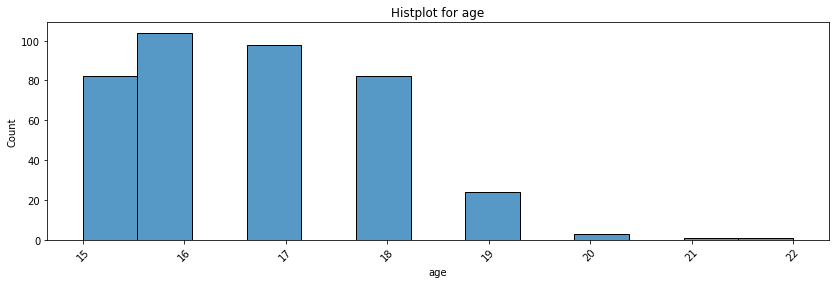

Описание признака: Medu


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

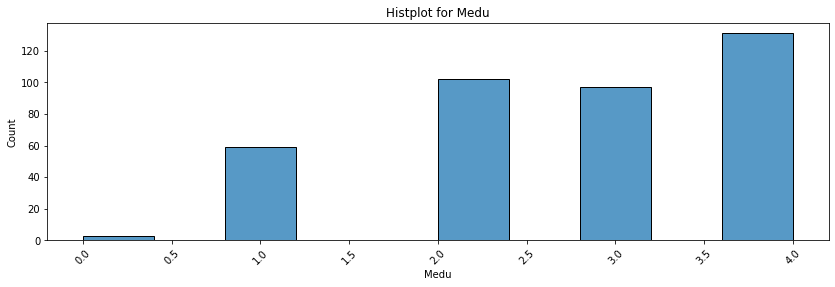

Описание признака: Fedu


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

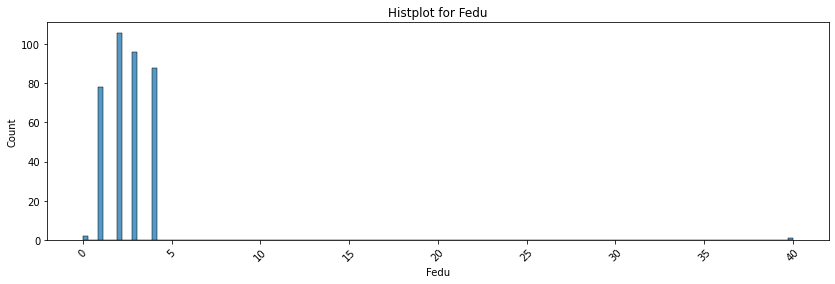

Описание признака: traveltime


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

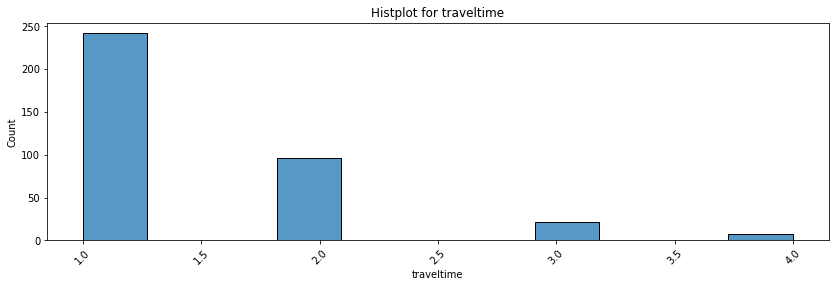

Описание признака: studytime


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

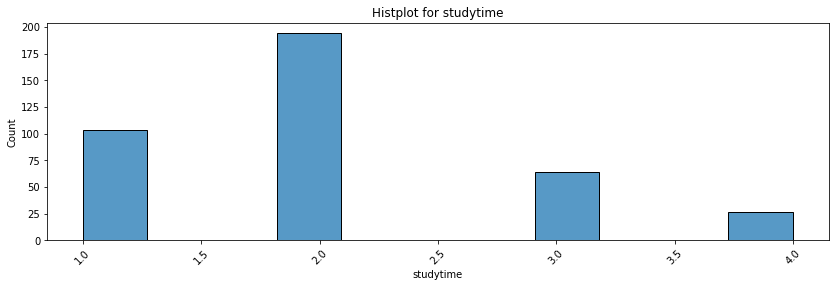

Описание признака: failures


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

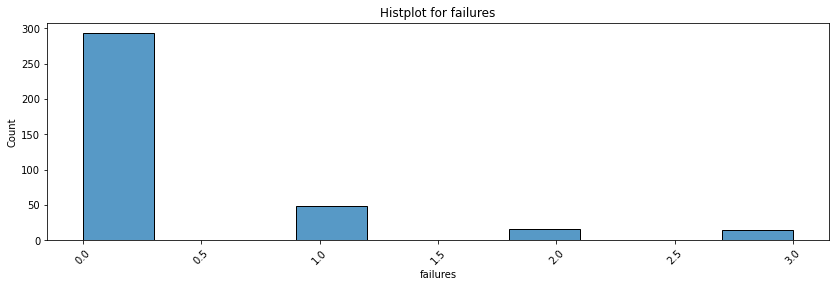

Описание признака: studytime, granular


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

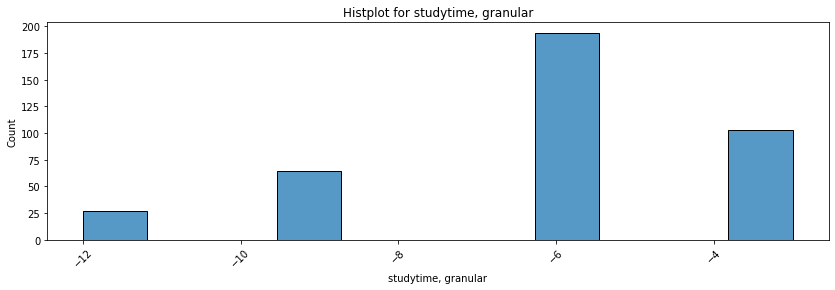

Описание признака: famrel


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

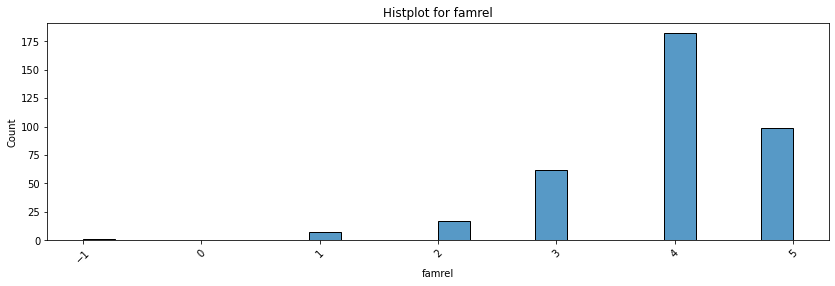

Описание признака: freetime


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

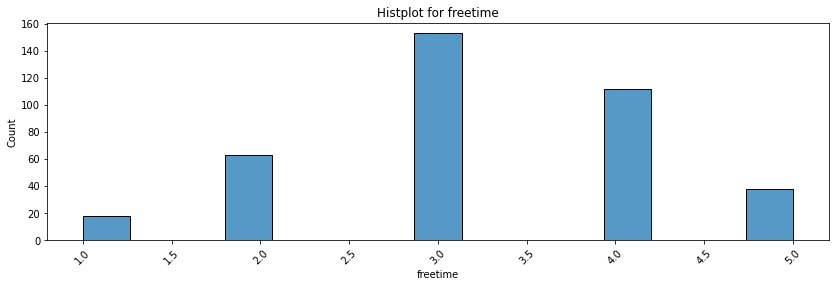

Описание признака: goout


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

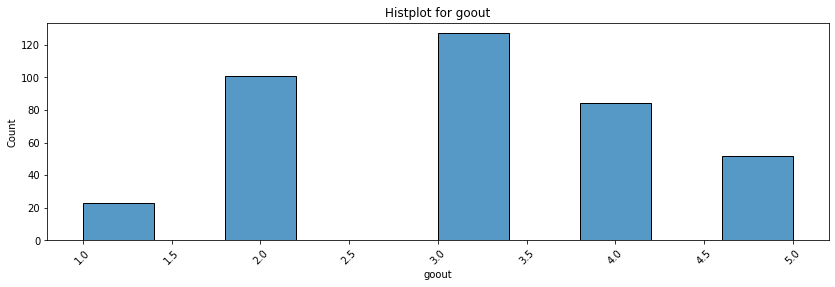

Описание признака: health


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

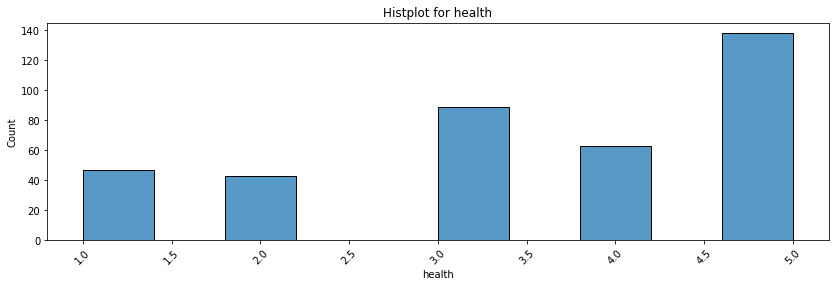

Описание признака: absences


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

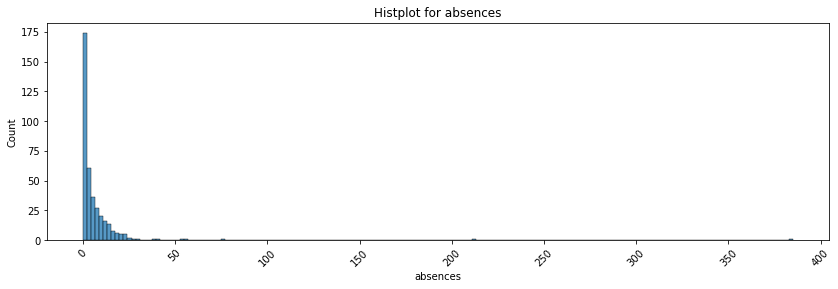

Описание признака: score


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

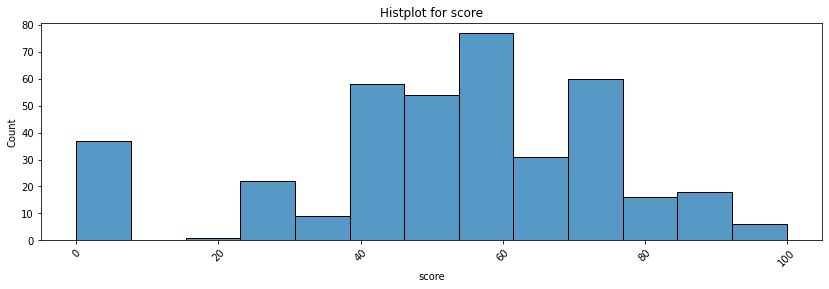

In [7]:
# Функция для вывода гистограмм признаков
def get_histplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.histplot(data=stud_df[column], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Histplot for ' + column)
    plt.show()


# Перебираем все столбцы датасета в цикле
for col in stud_df.columns:
    # Задаем условие отбора только числовых признаков.
    if stud_df[col].dtype != 'object':
        print('Описание признака: ' + col)
        # Заобно выведем описание основных параметров распределения.
        display(stud_df[col].describe())
        get_histplot(col)

Начнем с нашего целевого признака - балл по математике.
Видно что имеется более 30 записей с баллом 0, который на экзамене можно получить только скорее всего на него не явившись. Ну а такие случаи для нашего анализа не интересны поэтому засчитаем их за выброс от удалим из нашего датасета:

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:xlabel='score', ylabel='Count'>

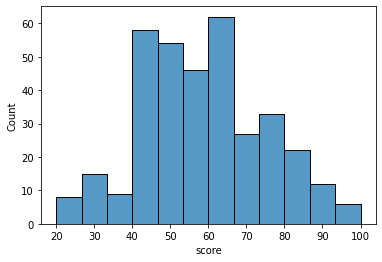

In [8]:
# Удаляем строки в которых значение бала по математике равно 0
stud_df = stud_df.drop(stud_df[stud_df['score'] == 0].index)

# Заодно выведем обшую инормацию об этом признаке и посмотрим на его распределение после удаления выбросов.
display(stud_df['score'].describe())
sns.histplot(stud_df['score'])

Таким образом мы выидим, что осталось 352 записи без пропуска в признаке балла по математике.
Общий вид распредления отдаленно напоминает нормальный с положительным смещением.

Теперь посмотрим на остальные признаки - имеются выбросы в признаках уровня образования отца, отношений в семье и числе пропущенных занятий.
Для удаления выбросов воспользуемся простым здравым смыслом, т.к. выбросы весьма хорошо видны при беглом визуальном осмотре распределения.

In [9]:
# Удаляем поочередно выбросы в каждом из 3- вышеназванных столбцов
cleaned = stud_df.drop(stud_df[stud_df['Fedu'] == 40].index)
# И заодно посмотрим на значением оставшихся записей после удаления.
display(cleaned.shape[0])
cleaned = cleaned.drop(cleaned[cleaned['absences'] > 30].index)
display(cleaned.shape[0])
cleaned = cleaned.drop(cleaned[cleaned['famrel'] == -1].index)
cleaned.shape[0]

357

350

349

Таким образом, всего выбросов у нас было 9, юольше всего в числе пропусков - 7.
Поскольку наш датасет несильно пострадал, спокойно сохраяем очищенные данные в основную переменную.

In [10]:
stud_df = cleaned

Теперь изучим наши данные на предмет пропущенных значений.

school                  0
sex                     0
age                     0
address                16
famsize                24
Pstatus                37
Medu                    2
Fedu                   21
Mjob                   17
Fjob                   32
reason                 15
guardian               28
traveltime             23
studytime               7
failures               20
schoolsup               9
famsup                 35
paid                   37
activities             12
nursery                13
studytime, granular     7
higher                 19
internet               29
romantic               29
famrel                 23
freetime                9
goout                   7
health                 13
absences               11
score                   6
dtype: int64

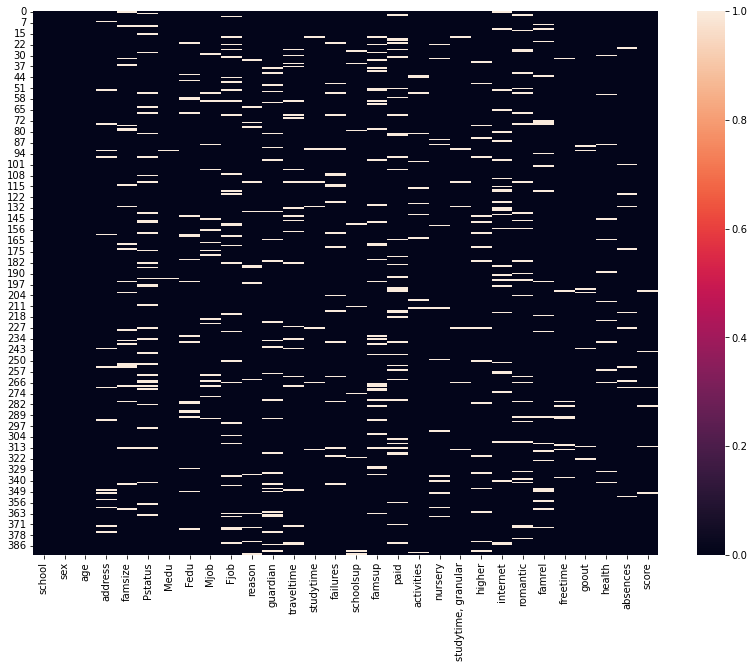

In [11]:
# Преобразуем в строковых стоблцах пустые строки в валидные пропуски
for col in stud_df.columns:
    if stud_df[col].dtype == 'object':
        stud_df[col] = stud_df[col].apply(
            lambda x: np.nan if x is np.nan else np.nan if x.strip() == '' else x)

# Выведем информацию о пропусках на тепловой карте и колличественно по каждому столбцу.
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(stud_df.isna(), ax=ax)
stud_df.isna().sum()

Мы видим, что хотя общее число пропусков по каждому отдельному стоблбцу и невелико (не более 15%), однако распределены они неравномерно. Поэтому простым удалением строк с пропусками решить проблемму не удастся, т.к. останется только очень малая часть данных.
При этом, поскольку почти все признаки проядковые, номинальные или биноминальные, то путем замещения мы получим вероятно искажение этих признаков. 
Но, поскольку число пропусков в каждом столбце не велико то мы можем предварительно оценить значимость признаков для последующего моделирования, т.к. при сокращении количества столбцов уменьшится и разброс пропусков, что позволит удалить их с приемлимым ущербом для количества данных.

Однако, столбец score можно очистить от пропусков уже сейчас, т.к. он ключевой признак и пропуски нам в нем всеравно не поднадобятся.

In [12]:
stud_df = stud_df.drop(stud_df[stud_df['score'].isna()].index)
stud_df.shape[0]

343

Итого данные очищены от 6 строк с пропусками по столбцу score.

Присупим к анализу зависимости признаков.

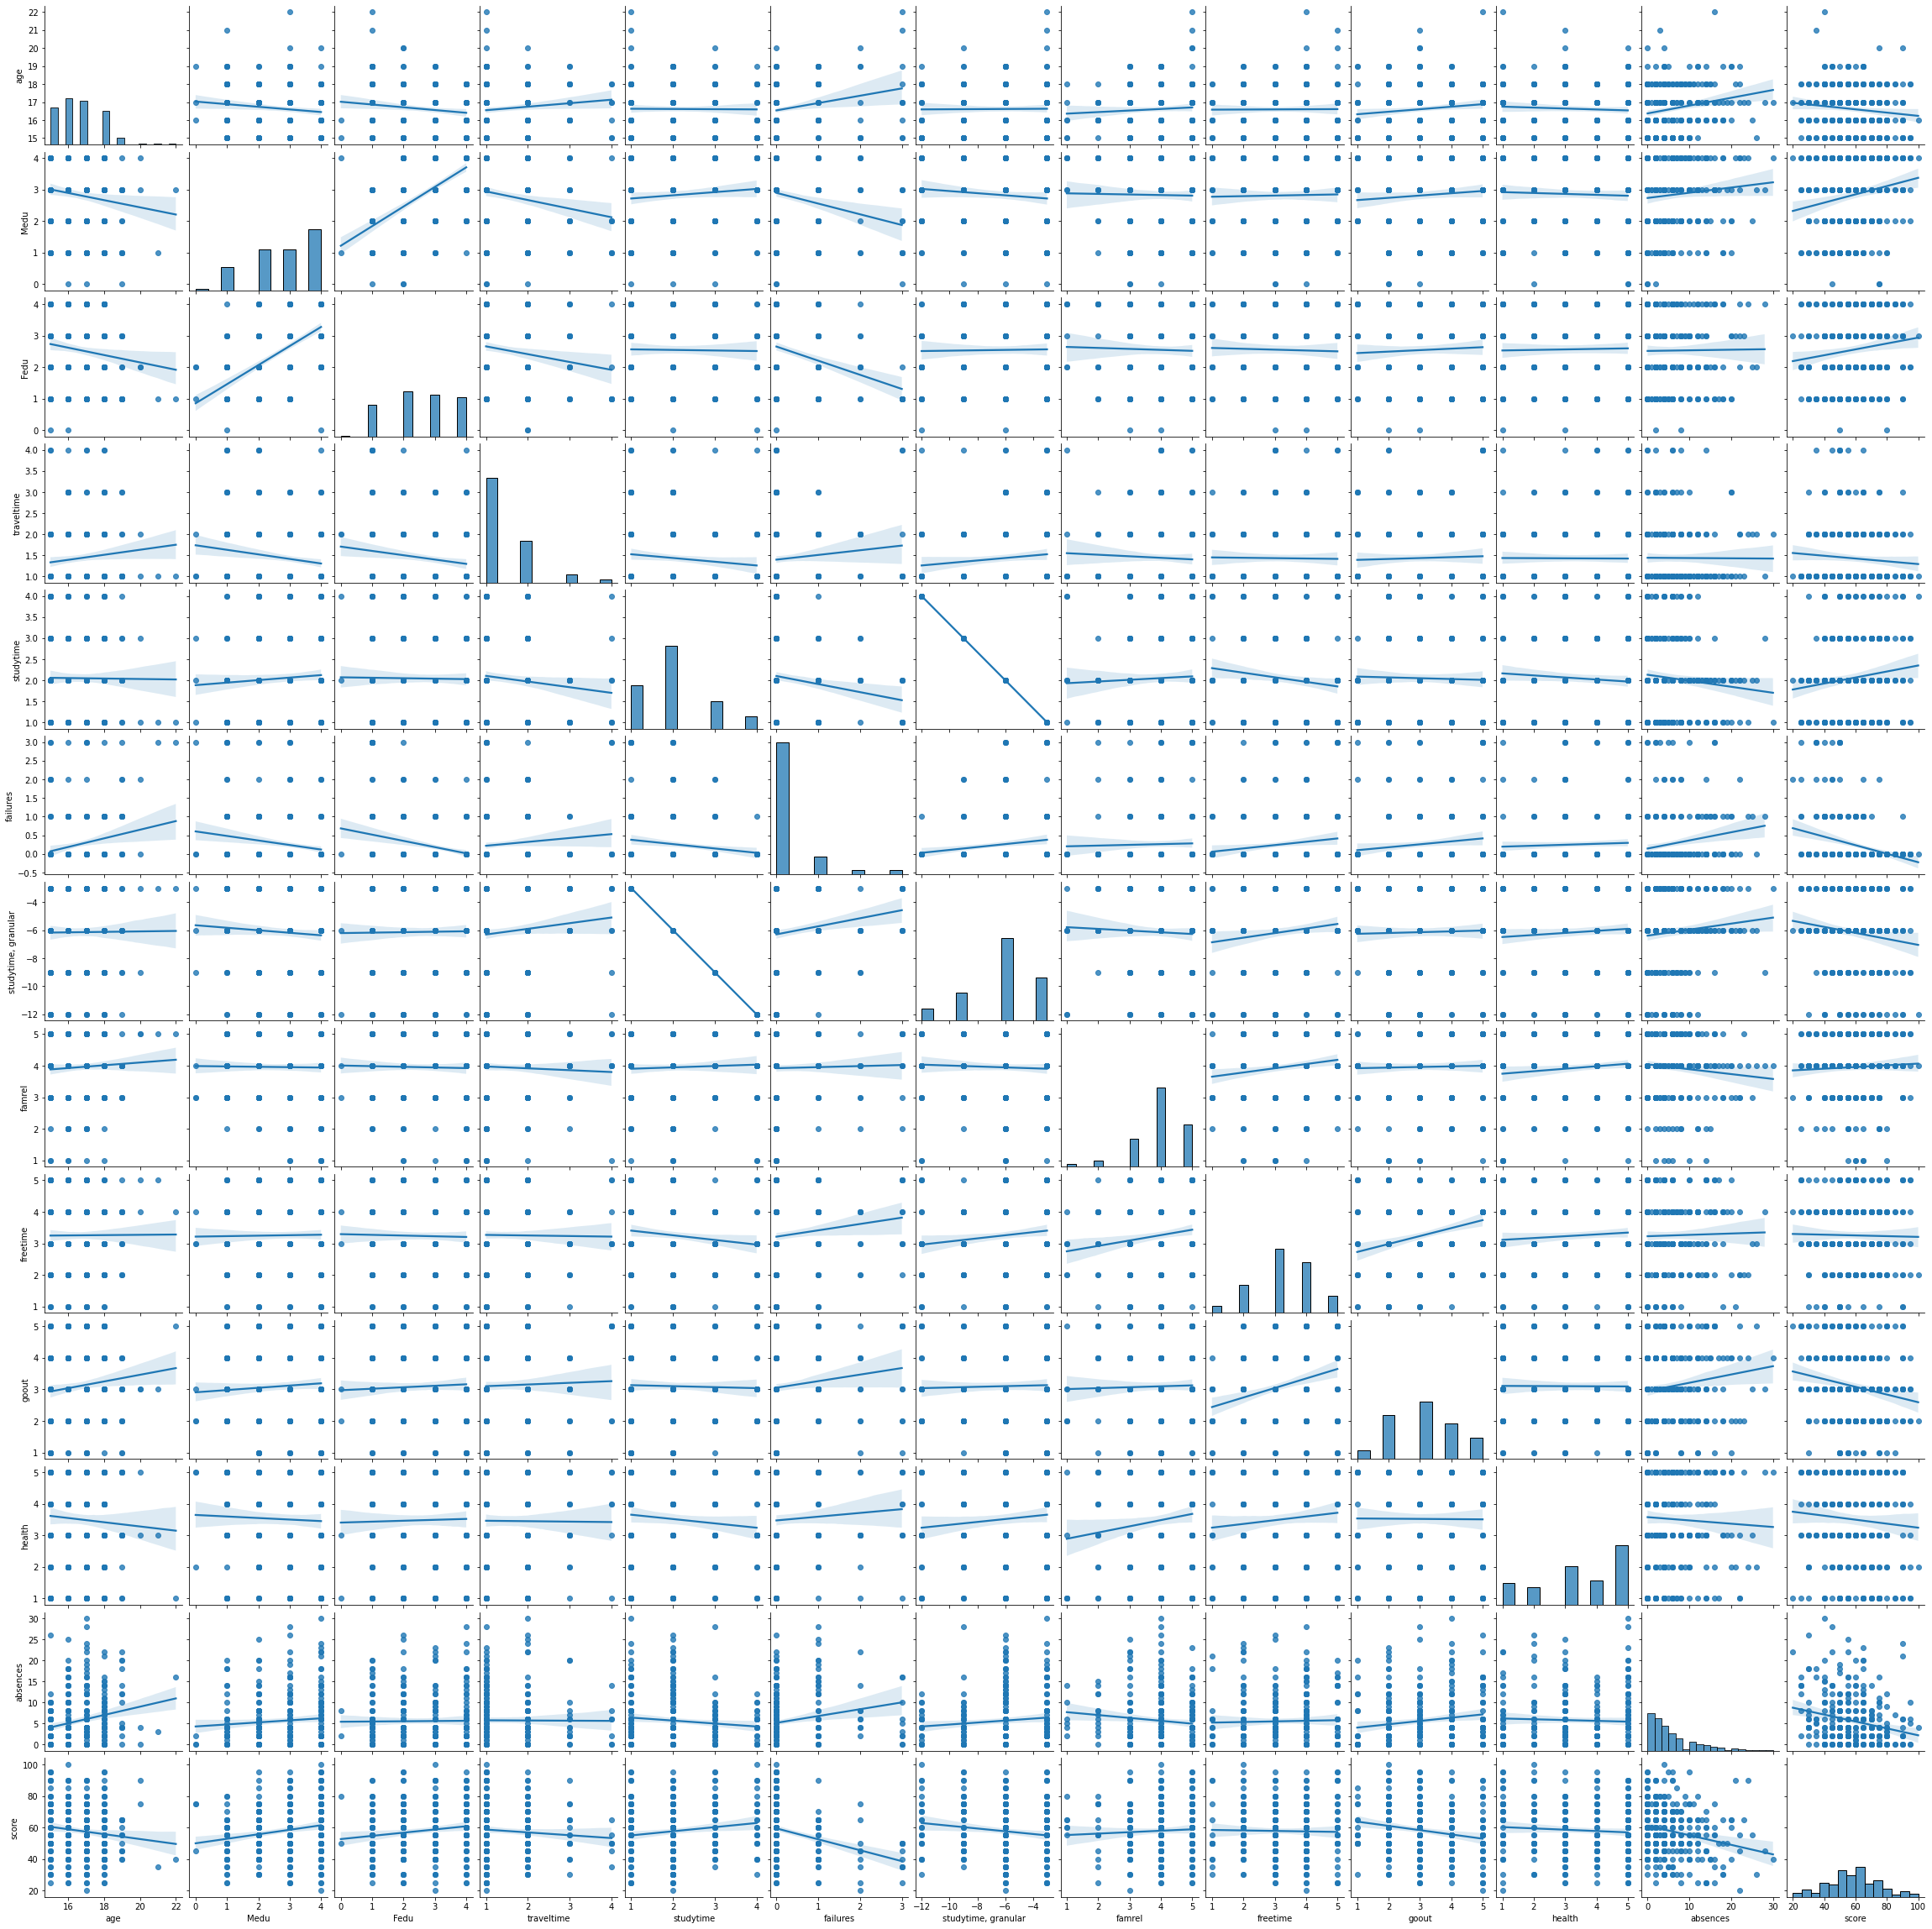

In [13]:
# Для начала, выведем попарные диаграммы рассеяния для всех числовых признаков
sns.pairplot(stud_df, kind='reg')

Глядя на диаграммы выше, можно сразу отметить высокую корреляцию между признаками уровня обучения отца и матери - в последующем один из них можно будет скоратить.
А также бросается в глаза то, что признаки "studytime" и "studytime, granular" - по сути являются инвертированным вариантом друг друга.

Теперь взглянем на числовое значение корреляции этих признаков с ключевым.
Используем корреляцию спирмана, т.к. мы имеем дело с набором данных без нормального распределения (кроме score), а также с большим числом поряковых признаков - поэтому нам подходит только непараметрическая статистика.

In [14]:
# дополнительно импортируем необходимую библиотечную функцию
from scipy.stats import spearmanr as sp

# Произведем перебор в цикле всех числовых признаков
for col in stud_df.columns:
    if stud_df[col].dtype != 'object':  # не будем включать текстовые
        print(col+': ')
        # Используем функцию с параметром nan_policy='omit' для игнорирования пропущенных значений.
        display(sp(stud_df[col], stud_df['score'], nan_policy='omit'))

age: 


SpearmanrResult(correlation=-0.12551582987728038, pvalue=0.020055766096810246)

Medu: 


SpearmanrResult(correlation=0.19658642727808254, pvalue=0.00025962244855973703)

Fedu: 


SpearmanrResult(correlation=0.14686290308688124, pvalue=0.008304350174853899)

traveltime: 


SpearmanrResult(correlation=-0.07542236756514972, pvalue=0.17835600211978905)

studytime: 


SpearmanrResult(correlation=0.1158288543803681, pvalue=0.03380296430039981)

failures: 


SpearmanrResult(correlation=-0.28393296751370406, pvalue=2.099273914464494e-07)

studytime, granular: 


SpearmanrResult(correlation=-0.1158288543803681, pvalue=0.03380296430039981)

famrel: 


SpearmanrResult(correlation=0.07018875873456812, pvalue=0.2104947666239679)

freetime: 


SpearmanrResult(correlation=-0.022330697383239465, pvalue=0.683380942161214)

goout: 


SpearmanrResult(correlation=-0.18905107600633256, pvalue=0.00048458371314704653)

health: 


SpearmanrResult(correlation=-0.04755022800325899, pvalue=0.3892367991686029)

absences: 


SpearmanrResult(correlation=-0.22573481239355161, pvalue=3.216497781901032e-05)

score: 


SpearmanrResult(correlation=1.0, pvalue=0.0)

Мы видим, что сильной корреляции с ключевым признаком нет ну одного из исследованных. 
Но мы можем отобрать те из них которые имеют статистическую достоверность при p < 0.05
И это оказываются признаки: 'age', 'Medu', 'Fedu', studytime', 'failures', 'goout', 'absences'
Из признаков уровня образования отца и матери выберем, как мы говорили выше только один и им будет уровень образзования матери, как имеющий большую кореляцию с исследуемым признаком.

Перейдем к нашим текстовым столбцам.
Используем для оценки из взаимосвязи с баллом по математике коробчатые диаграммы

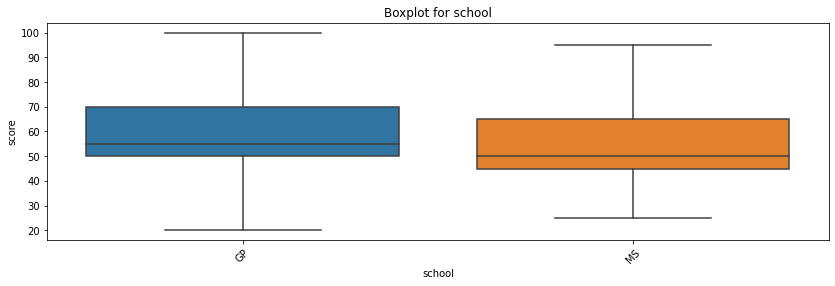

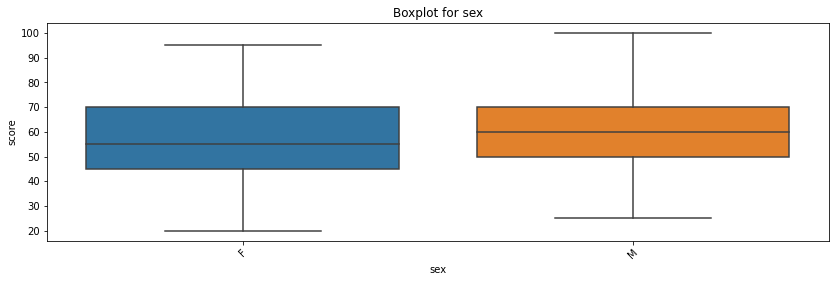

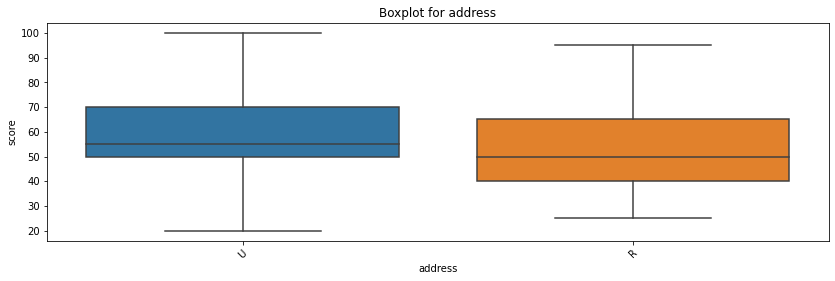

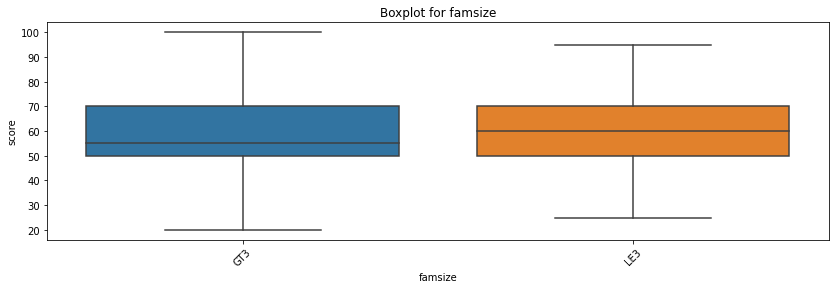

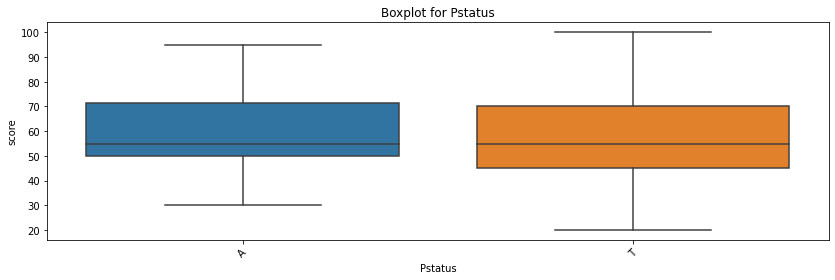

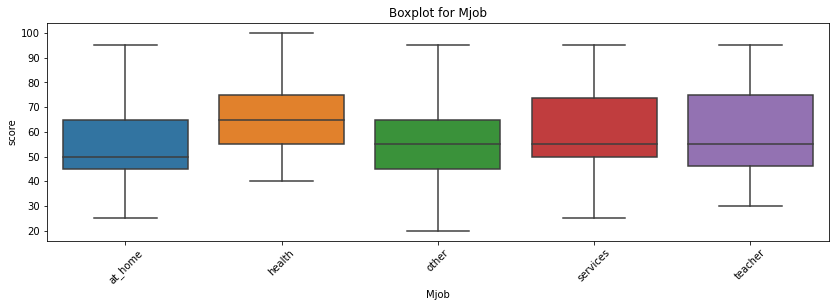

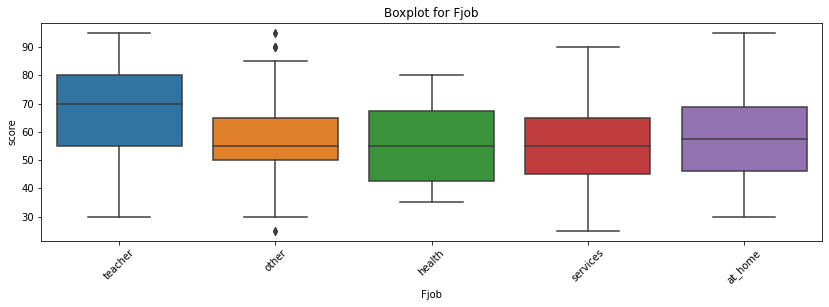

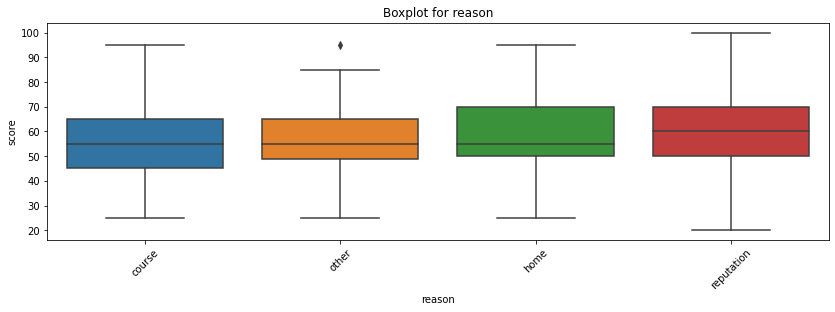

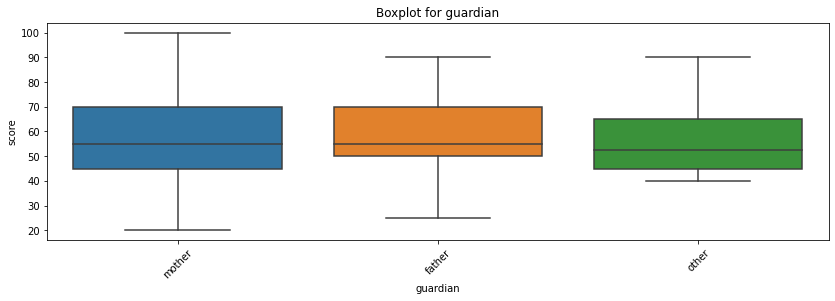

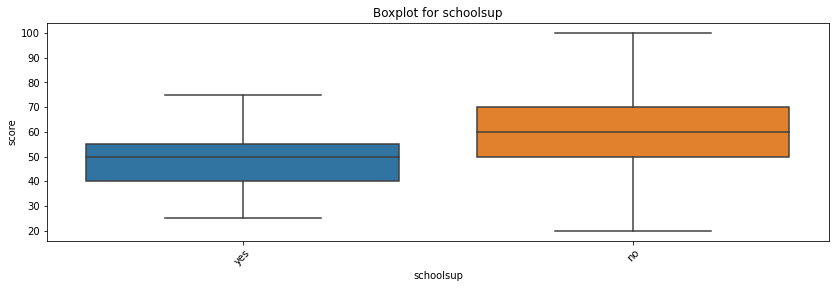

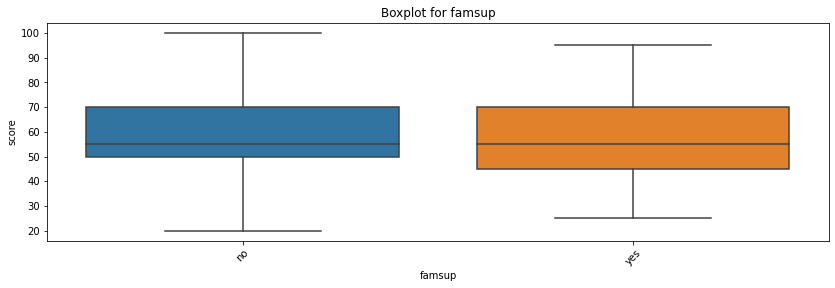

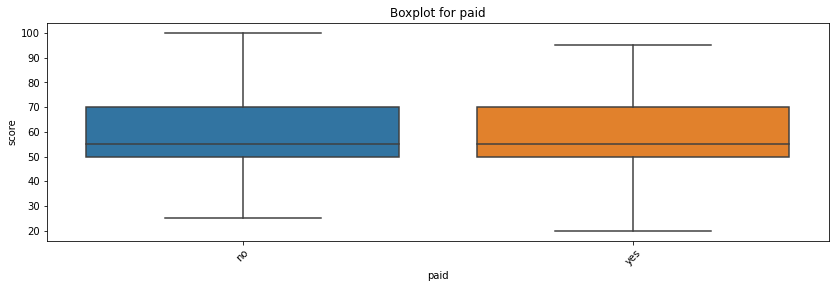

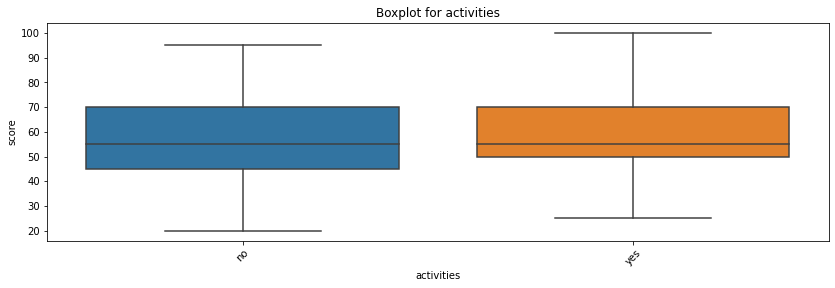

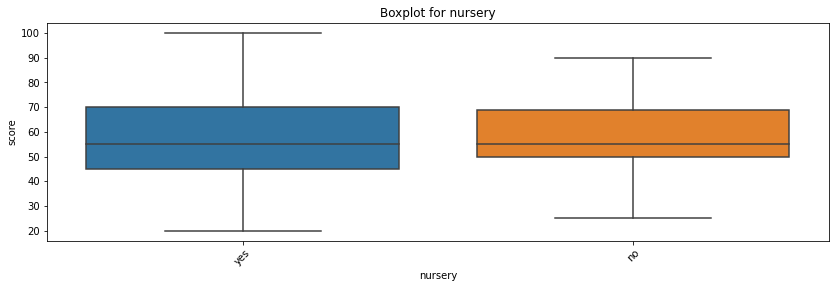

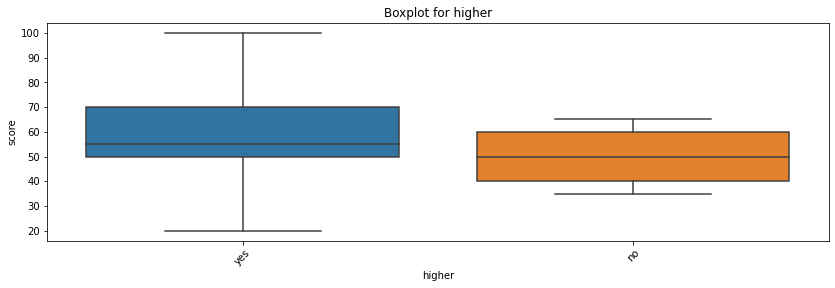

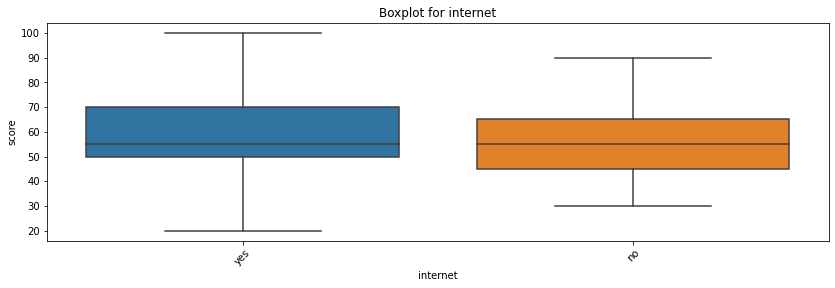

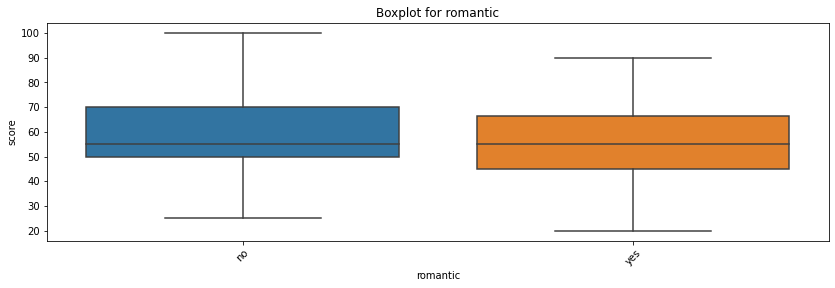

In [15]:
# Функция для построения коробчатых диаграм, чтобы не задавать одни и теже параметры для вывода каждого признака
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Перебираем все текстовые столбцы в цикле
for col in stud_df.columns:
    if stud_df[col].dtype == 'object':
        get_boxplot(col)

По диагрмаммам предварительно можно увидеть, во первых различия по стоблцам Mjob, Fjob, schoolsup и higher. А во-вторых, видно что во всех признаках каких либо аномальных значений нам не встречается (все значения в рамках заданных для них условий)

Для больее точной оценки используем t статистику с поправкой Бонферони

In [16]:
# Функция для попарного сравнения всех значений входящих в признак
def get_stat_dif(df, column):
    # Находим все возможные значения признака (из них отбираем 10 самх частых)
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    # Перебираем все комбинации по очереди в цикле и применяем к ним статистическую функцию
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            # Если есть статистические значимые различия, то выводим название стобца и завершаем цикл.
            print('Найдены статистически значимые различия для колонки', column)
            break

In [17]:
# Перебираем в цикле все столбцы и передаем из в функцию.
for col in stud_df.columns:
    if stud_df[col].dtype == 'object':
        get_stat_dif(stud_df, col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Итак мы выделили еще 4 статистически значимых по влиянию на ключевой признако стоблца.
Теперь можем формировать датасет для модели

In [18]:
# Список столбцов
for_modelling = ['age', 'Medu', 'Mjob', 'studytime',
                 'failures', 'goout', 'absences', 'sex', 'address', 'schoolsup', 'score']
# Сохраняем нужные нам столбцы в новую переменную
stud_df_for_model = stud_df.loc[:, for_modelling]
# Посмотрим на получившийся датасет
stud_df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        343 non-null    int64  
 1   Medu       341 non-null    float64
 2   Mjob       326 non-null    object 
 3   studytime  336 non-null    float64
 4   failures   323 non-null    float64
 5   goout      337 non-null    float64
 6   absences   333 non-null    float64
 7   sex        343 non-null    object 
 8   address    329 non-null    object 
 9   schoolsup  334 non-null    object 
 10  score      343 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 40.3+ KB


Итак, у нас имеется 10 признаков (не включая исследуемый), и зних 2 колличественных, 4 порядковых, 1 номинативный и 3 биноминальных
И 343 строки записей.
Однако, остались еще пустые значения, которые также нужно либо удлить либо заполнить перед моделированием.
Попробуем удалить

In [19]:
stud_df_for_model_without_na = stud_df_for_model.dropna(axis=0)
stud_df_for_model_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 393
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        267 non-null    int64  
 1   Medu       267 non-null    float64
 2   Mjob       267 non-null    object 
 3   studytime  267 non-null    float64
 4   failures   267 non-null    float64
 5   goout      267 non-null    float64
 6   absences   267 non-null    float64
 7   sex        267 non-null    object 
 8   address    267 non-null    object 
 9   schoolsup  267 non-null    object 
 10  score      267 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 25.0+ KB


В датасете с удаленными признаками мы имеем уже 267 записей, итого мы потеряли 86 записей из 343, что составляет примерно 25% от общего числа.

Также дополнительно создадим дополнительный датасет в котором будем не удалять пропуски а заполним их

In [20]:
# Создадим словарь для заполнения, заполнять будем модой, тк у нас порядковые, номинативные и биноминальные признаки
values = {
    'Medu': stud_df_for_model['Medu'].mode()[0],
    'Mjob': stud_df_for_model['Mjob'].mode()[0],
    'studytime': stud_df_for_model['studytime'].mode()[0],
    'failures': stud_df_for_model['failures'].mode()[0],
    'goout': stud_df_for_model['goout'].mode()[0],
    'sex': stud_df_for_model['sex'].mode()[0],
    'address': stud_df_for_model['address'].mode()[0],
    'schoolsup': stud_df_for_model['schoolsup'].mode()[0]
}
# Заполняем пропуски на основании словаря
stud_df_for_model_with_filled_na = stud_df_for_model.fillna(values, axis=0)
# Отдельно заполним пропуски в признаке пропущенных занятий, т.к он у нас единственный количественный с пропусками. Для заполнения используем интерполяцию.
stud_df_for_model_with_filled_na['absences'].interpolate(inplace=True)
stud_df_for_model_with_filled_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        343 non-null    int64  
 1   Medu       343 non-null    float64
 2   Mjob       343 non-null    object 
 3   studytime  343 non-null    float64
 4   failures   343 non-null    float64
 5   goout      343 non-null    float64
 6   absences   343 non-null    float64
 7   sex        343 non-null    object 
 8   address    343 non-null    object 
 9   schoolsup  343 non-null    object 
 10  score      343 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 40.3+ KB


ИТОГИ:
В результате проведенной работы отобрано 10 признаков, данные очищены от выбросов и получено два датасета для модели с разным методом очистки от пропусков: 
1) с удалением - меньше данных, но они чище
2) с подстановкой - данных больше, но они менее чистые, тк содержат заглушки, вносящие искажение в исходное распределение